In [1]:
import numpy as np
import matplotlib.pyplot as plt
from time import sleep

In [33]:
length = 100
percent = 0.2

half_len = int(length/2)
dim = 2

mean1 = [7,13]     # class-1 
mean2 = [13,7]   # class-2 
cov = [[4, 0], [0, 4]]


x1 = np.random.multivariate_normal(mean1, cov, half_len)
x2 = np.random.multivariate_normal(mean2, cov, half_len)
y1 = np.ones(half_len)
y2 = np.zeros(half_len)

x = np.append(x1,x2, axis=0)
y = np.append(y1,y2, axis=0)


# Shuffle the data
perm = np.random.permutation(length)
x = x[perm]
y = y[perm]

# Divide into train and test 
x_train = x[0   :   int(length*(1-percent))]
y_train = y[0   :   int(length*(1-percent))]
x_test = x[int(length*percent)   :   ]
y_test = y[int(length*percent)   :   ]

len_train = x_train.shape[0]
len_test = x_test.shape[0]

x_train = x_train.T
x_test = x_test.T

y_train = np.expand_dims(y_train, axis=0)
y_test = np.expand_dims(y_test, axis=0)

print(x_train.shape)
print(y_train.shape)

(2, 80)
(1, 80)


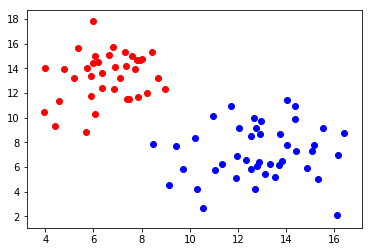

In [22]:
for i in range(len_train):
    if(y_train[0,i] == 1):
        plt.scatter(x_train[0,i], x_train[1,i], color='red')
    elif(y_train[0,i] == 0):
        plt.scatter(x_train[0,i], x_train[1,i], color='blue')

In [23]:
class LogisticRegression : 
    def __init__(self, x ,y, lr=0.001, reg=0.001):
        self.x = x
        self.y = y
        self.lr = lr
        self.reg = reg
        self.dim = self.x.shape[0]
        self.length = self.x.shape[1]
        self.w = np.random.random((dim, 1))
        self.b = 5
    
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_prime(self, x):
        return self.sigmoid(x) * (1 - self.sigmoid(x))
        
    def forward(self, x):
        return np.dot(self.w.T, x) + self.b
    
    def forward_prob(self, x):
        return self.sigmoid( self.forward(x) )
    
    def weight_derivative(self):
        ycap = self.forward_prob(self.x)
        return -(1/self.length) * np.dot( self.x, (self.y-ycap).T ) + self.reg * self.w
    
    def bias_derivative(self): 
        ycap = self.forward_prob(self.x)
        return (1/self.length)*np.sum( ycap - self.y )
    
    def update(self):
        del_W = self.weight_derivative()
        del_b = self.bias_derivative()
        self.w = self.w - self.lr * del_W
        self.b = self.b - self.lr * del_b
    
    def cost(self, y, yhat):
        # Cross Entropy Loss
        J = (1/self.length) * (-self.y*np.log(yhat) - (1-self.y)*np.log(1-yhat)) + self.reg * np.sum(self.w * self.w)
        return np.sum(J)

train:  4.2437370727847785 test:  4.547340612199789
train:  4.183063654230778 test:  4.490626643279343
train:  4.122487974598769 test:  4.43401030954135
train:  4.062010565355807 test:  4.377492135488601
train:  4.001632021826996 test:  4.32107270880732
train:  3.9413530109804995 test:  4.264752688094456
train:  3.8811742801773206 test:  4.208532811545401
train:  3.821096667003558 test:  4.152413906720093
train:  3.761121110322625 test:  4.096396901524794
train:  3.7012486626969126 test:  4.040482836557627
train:  3.641480504349473 test:  3.9846728789901746
train:  3.581817958855444 test:  3.928968338172503
train:  3.5222625107760845 test:  3.873370683175806
train:  3.4628158254731156 test:  3.8178815625088633
train:  3.4034797713683123 test:  3.7625028262728835
train:  3.3442564449436576 test:  3.7072365510502
train:  3.2851481988102034 test:  3.6520850678529126
train:  3.226157673208709 test:  3.5970509934942148
train:  3.1672878313435806 test:  3.542137265782057
train:  3.1085419989

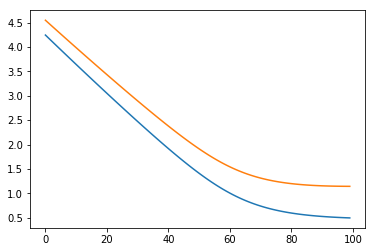

In [40]:
rate = 1e-3
reg = 1e-2
lr = LogisticRegression(x_train, y_train, rate, reg)

x1 = np.linspace(0,20)

cost_train = []
cost_test = []
for i in range(100):
    yhat_train = lr.forward_prob(x_train)
    c_train = lr.cost(y_train, yhat_train)
    yhat_test = lr.forward_prob(x_test)
    c_test = lr.cost(y_train, yhat_test)
    print('train: ', c_train, 'test: ', c_test)
    
    cost_train.append(c_train)
    cost_test.append(c_test)
    
    lr.update()

plt.plot(cost_train)
plt.plot(cost_test)

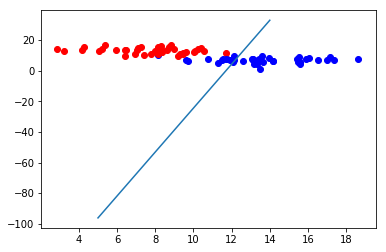

In [41]:
x1 = np.linspace(5,14)
x2 = (-1/lr.w[1,0]) * (lr.b + lr.w[0,0]*x1)

for i in range(len_train):
    if(y_train[0,i] == 1):
        plt.scatter(x_train[0,i], x_train[1,i], color='red')
    elif(y_train[0,i] == 0):
        plt.scatter(x_train[0,i], x_train[1,i], color='blue')
plt.plot(x1,x2)